In [6]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
uploaded = files.upload()

Saving credit_score.csv to credit_score.csv


In [3]:
data = pd.read_csv("credit_score.csv")

In [4]:
data.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


/tmp/ipython-input-2187186370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


Correlation Between Debt and Credit Score: -0.33


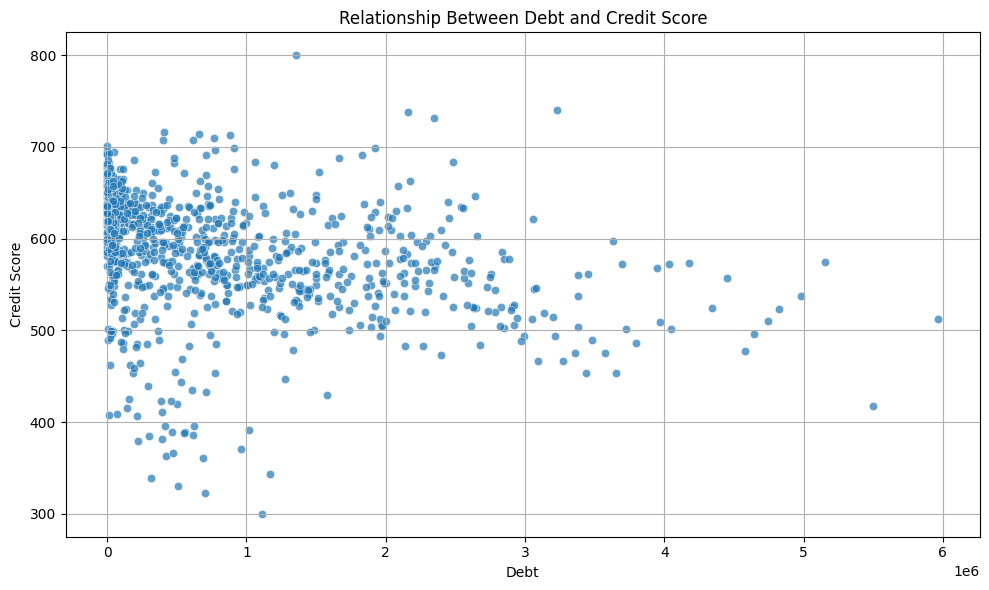

In [5]:
dataframe = data[["DEBT","CREDIT_SCORE"]]
dataframe.dropna(inplace=True)
correlation = dataframe["DEBT"].corr(dataframe["CREDIT_SCORE"])
print(f"Correlation Between Debt and Credit Score: {correlation:.2f}")
plt.figure(figsize=(10,6))
sns.scatterplot(x="DEBT", y="CREDIT_SCORE", data=dataframe, alpha=0.7)
plt.title("Relationship Between Debt and Credit Score")
plt.xlabel("Debt")
plt.ylabel("Credit Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
X = data[["INCOME","SAVINGS","DEBT","CAT_CREDIT_CARD","DEFAULT"]]
y = data["CREDIT_SCORE"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train,y_train)

def predict_credit_score(income, savings, debt, cat_credit_card, default):
  input_data = pd.DataFrame({
      'INCOME': [income],
      'SAVINGS': [savings],
      'DEBT': [debt],
      'CAT_CREDIT_CARD': [cat_credit_card],
      'DEFAULT': [default]
  })
  credit_score_prediction = model_dt.predict(input_data)
  return credit_score_prediction[0]

income = float(input("Enter customer's income:"))
savings = float(input("Enter customer's savings:"))
debt = float(input("Enter customer's debt:"))
cat_credit_card = int(input("Enter 1 if customer has credit card, 0 otherwise:"))
default = int(input("Enter 1 if customer has defaulted, 0 otherwise:"))

predicted_credit_score = predict_credit_score(income,savings,debt,cat_credit_card,default)
print(f"Predicted credit Score: {predicted_credit_score:.2f}")

Enter customer's income:6000


KeyboardInterrupt: Interrupted by user